<a href="https://colab.research.google.com/github/yashyaks/compute_tasks/blob/main/Lab_9/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs

features,true_labels = make_blobs(n_samples=200, centers=3, cluster_std=2.7, random_state=42)

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [3]:
scaled_features[:5]

array([[ 2.12188705,  0.25347404],
       [-1.50862947,  1.40806052],
       [-1.00536772, -1.5628717 ],
       [-1.73613935, -1.76216219],
       [-1.29909276, -0.88054031]])

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

In [5]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [6]:
kmeans.inertia_

72.55689689365892

In [7]:
kmeans.cluster_centers_

array([[-0.25738366,  1.05892303],
       [-0.92404827, -1.18822514],
       [ 1.19933242,  0.13126124]])

In [8]:
kmeans_kwargs = {'init':'random','n_init':10,'max_iter':300,'random_state':42}

In [15]:
inertia_list = []
for cluster in range(1, 11): 
    kmeans = KMeans(n_clusters=cluster,**kmeans_kwargs) 
    
    kmeans.fit(scaled_features)
    
    temp_inertia = kmeans.inertia_ 

    inertia_list.append(temp_inertia)

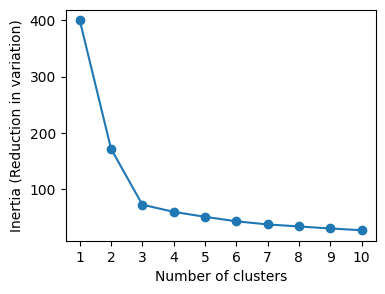

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
plt.plot(range(1, 11), inertia_list, marker='o')
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Reduction in variation)')
plt.show()

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_coefficients = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

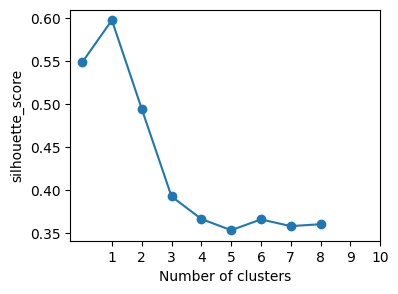

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
plt.plot(silhouette_coefficients, marker='o')
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()